In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
992,6.26,12.0,0
574,6.54,33.0,0
670,7.51,17.0,1
331,6.12,22.0,1
258,6.12,6.0,1


C:\Users\Hanif ullah laptop\AppData\Local\Temp\ipykernel_7672\2719022096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"] , hist = False)
C:\Users\Hanif ullah laptop\AppData\Local\Temp\ipykernel_7672\2719022096.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

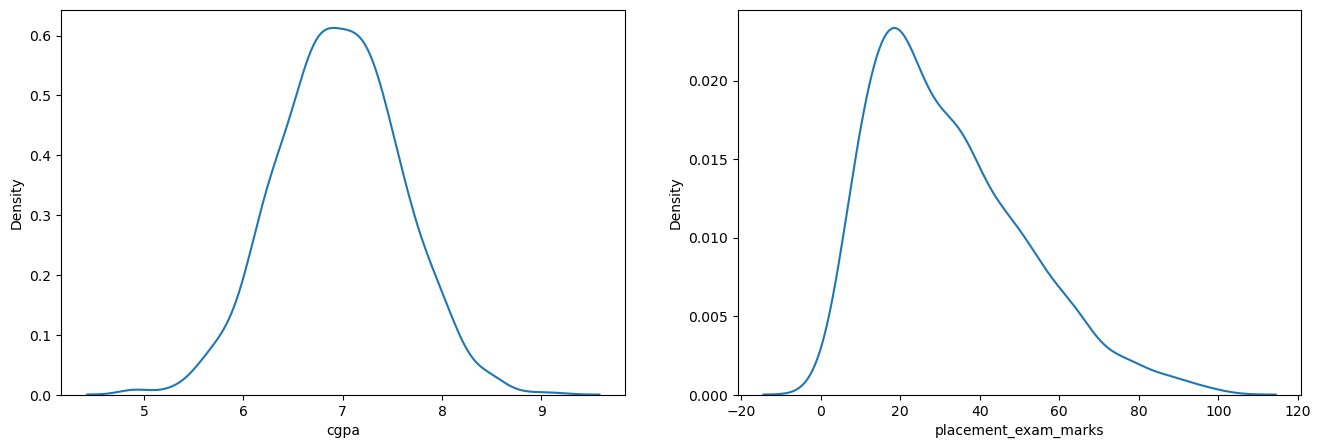

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"] , hist = False)
plt.subplot(1,2,2)
sns.distplot(df["placement_exam_marks"] , hist = False)
plt.show()

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [12]:
HB = df["cgpa"].mean()+3*df["cgpa"].std()
LB = df["cgpa"].mean()-3*df["cgpa"].std()
print("highes boundry" , HB ,"Lowest boundry" , LB)

highes boundry 8.808933625397168 Lowest boundry 5.113546374602832


In [15]:
df[(df["cgpa"] > HB) | (df["cgpa"] < LB)]


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#  Trimming

In [17]:
new_df = df[(df["cgpa"] < HB) & (df["cgpa"] > LB)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Capping

In [19]:
HB = df["cgpa"].mean()+3*df["cgpa"].std()
LB = df["cgpa"].mean()-3*df["cgpa"].std()
df["cgpa"]= np.where(
    df["cgpa"]>HB,
     HB,
     np.where(
          df["cgpa"]<LB,
             LB,
          df["cgpa"]
     )
)


In [24]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64